In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf

import numpy as np

In [2]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [3]:
dta = pd.read_csv(r"C:\dta\50_Startups.csv")
dta.head()


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [7]:
from sklearn import preprocessing 
label = preprocessing.LabelEncoder() 
 
dta['State']= label.fit_transform(dta['State']) 

In [8]:
dta3=dta.rename({'R&D Spend':'RD'},axis=1)

In [9]:
dta4=dta3.rename({'Marketing Spend':'MS'},axis=1)

In [10]:
dta4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RD              50 non-null     float64
 1   Administration  50 non-null     float64
 2   MS              50 non-null     float64
 3   State           50 non-null     int32  
 4   Profit          50 non-null     float64
dtypes: float64(4), int32(1)
memory usage: 1.9 KB


In [12]:
dta4.isna().sum()

RD                0
Administration    0
MS                0
State             0
Profit            0
dtype: int64

In [13]:
dta4.corr()

,RD,Administration,MS,State,Profit
RD,1.000000,0.241955,0.724248,0.104685,0.972900
Administration,0.241955,1.000000,-0.032154,0.011847,0.200717
MS,0.724248,-0.032154,1.000000,0.077670,0.747766
State,0.104685,0.011847,0.077670,1.000000,0.101796
Profit,0.972900,0.200717,0.747766,0.101796,1.000000


In [14]:
dta4.head()

,RD,Administration,MS,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


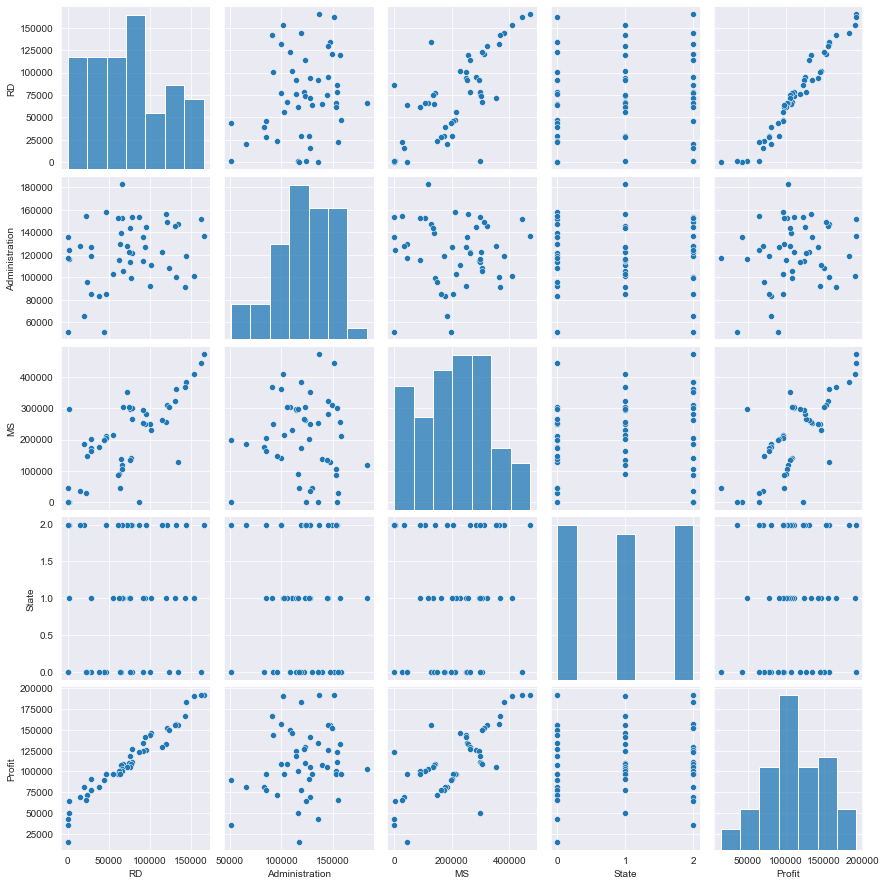

In [15]:
sns.set_style(style='darkgrid')
sns.pairplot(dta4)

In [19]:
import statsmodels.formula.api as smf 
model = smf.ols('Profit~RD+Administration+MS+State',data=dta4).fit()


In [20]:
model.params

Intercept         50142.506443
RD                    0.805760
Administration       -0.026826
MS                    0.027228
State               -22.320577
dtype: float64

In [21]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept          7.368962
RD                17.608621
Administration    -0.519906
MS                 1.636966
State             -0.013865
dtype: float64 
 Intercept         2.900008e-09
RD                8.249206e-22
Administration    6.056771e-01
MS                1.086131e-01
State             9.889988e-01
dtype: float64


In [22]:
(model.rsquared,model.rsquared_adj)

(0.9507462044842656, 0.9463680893273114)

In [24]:
ml_v=smf.ols('Profit~Administration',data = dta4).fit()  
#t and p-Values

print(ml_v.tvalues, '\n', ml_v.pvalues) 

Intercept         3.040044
Administration    1.419493
dtype: float64 
 Intercept         0.003824
Administration    0.162217
dtype: float64


In [25]:
ml_v=smf.ols('Profit~State',data = dta4).fit()  
#t and p-Values

print(ml_v.tvalues, '\n', ml_v.pvalues) 

Intercept    11.891440
State         0.708948
dtype: float64 
 Intercept    6.485443e-16
State        4.817858e-01
dtype: float64


In [27]:
ml_v=smf.ols('Profit~Administration+State',data = dta4).fit()  
#t and p-Values

print(ml_v.tvalues, '\n', ml_v.pvalues) 

Intercept         2.752300
Administration    1.403534
State             0.699397
dtype: float64 
 Intercept         0.008382
Administration    0.167030
State             0.487751
dtype: float64


In [43]:
rsq_RD = smf.ols('RD~Administration+MS+State',data=dta4).fit().rsquared  
vif_RD = 1/(1-rsq_RD) # 16.33

rsq_Administration = smf.ols('Administration~RD+MS+State',data=dta4).fit().rsquared  
vif_Administration = 1/(1-rsq_Administration) # 564.98
    
rsq_MS = smf.ols('MS~Administration+RD+State',data=dta4).fit().rsquared  
vif_MS = 1/(1-rsq_MS) #  564.84

rsq_State = smf.ols('State~Administration+RD+MS',data=dta4).fit().rsquared  
vif_State = 1/(1-rsq_State) #  564.84


# Storing vif values in a data frame
d1 = {'Variables':['Administration','RD','MS','State'],'VIF':[vif_Administration,vif_RD,vif_MS,vif_State]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Administration,1.175315
1,RD,2.481178
2,MS,2.326780
3,State,1.011281


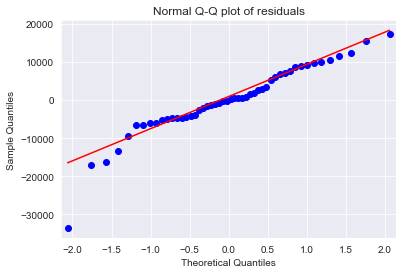

In [28]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [29]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

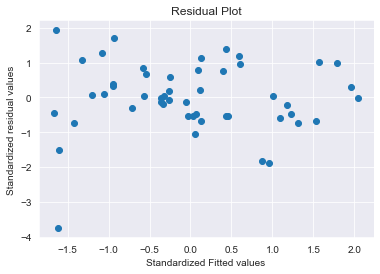

In [30]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [31]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

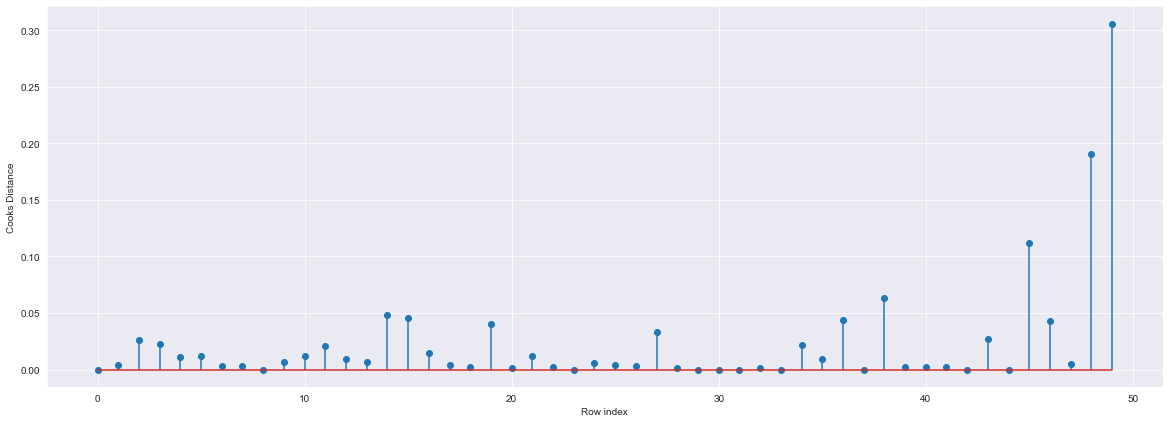

In [33]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(dta4)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [34]:
(np.argmax(c),np.max(c))

(49, 0.3060281954699332)

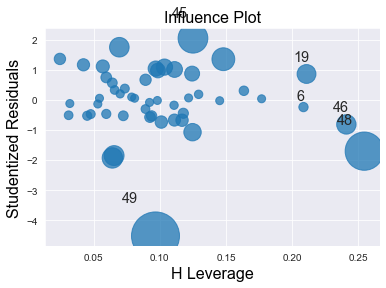

In [35]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [37]:
k = dta4.shape[1]
n = dta4.shape[0]
leverage_cutoff = 3*((k + 1)/n)

In [38]:
leverage_cutoff 

0.36

In [39]:
dta4[dta4.index.isin([49])]

,RD,Administration,MS,State,Profit
49,0.0,116983.8,45173.06,0,14681.4


In [44]:
dta6=dta4.drop(dta4.index[[49]],axis=0).reset_index()

In [45]:
dta7=dta6.drop(['index'],axis=1)

In [53]:
import statsmodels.formula.api as smf 
model = smf.ols('Profit~RD+State+MS',data=dta7).fit()


In [54]:
print(model.tvalues, '\n', model.pvalues)

Intercept    18.996658
RD           22.025135
State        -0.712998
MS            2.090367
dtype: float64 
 Intercept    4.034566e-23
RD           9.782292e-26
State        4.795281e-01
MS           4.226481e-02
dtype: float64


In [55]:
(model.rsquared,model.rsquared_adj)

(0.9615203861714393, 0.9589550785828687)

In [56]:
pred_y = model.predict(dta4)

In [57]:
pred_y

0     190104.394105
1     189127.759291
2     180068.562333
3     171384.797716
4     170121.142254
5     161122.781279
6     158728.880497
7     159790.378782
8     150915.292953
9     154826.831420
10    135149.157969
11    135711.785901
12    129464.520683
13    129050.918968
14    149901.863845
15    144874.696834
16    118514.212903
17    130015.669325
18    129057.911569
19    115872.606382
20    118088.591343
21    117851.948955
22    115499.188569
23    110520.237282
24    112444.282728
25    104683.053304
26    111895.713341
27    114438.183466
28    104254.657924
29    102644.133430
30    100363.242610
31     98654.632884
32    101189.301597
33     98699.956611
34     92514.611187
35     90125.214884
36     77492.251066
37     90307.355277
38     69544.818568
39     85423.084128
40     77748.346402
41     75888.821644
42     73097.434988
43     61771.869661
44     68680.942983
45     49584.471116
46     58883.491522
47     50680.115810
48     49176.441713
49     51918.332743
